<a href="https://colab.research.google.com/github/MuhammadBilal-403/Interboot/blob/main/BEGINNER_LEVEL_TASK_(PART_03).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/train.csv")


In [ ]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df = df[['date', 'sales', 'onpromotion']]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   sales        float64       
 2   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 68.7 MB


In [ ]:
df['onpromotion'] = df['onpromotion'].fillna(0)


In [ ]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


In [ ]:
daily_sales = df.groupby(['date', 'day', 'month', 'year'])[['sales', 'onpromotion']].sum().reset_index()


In [ ]:
X = daily_sales[['day', 'month', 'year', 'onpromotion']]
y = daily_sales['sales']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2*100)

MAE: 126241.3624653218
RMSE: 159310.980152748
R2 Score: 54.569570464768844


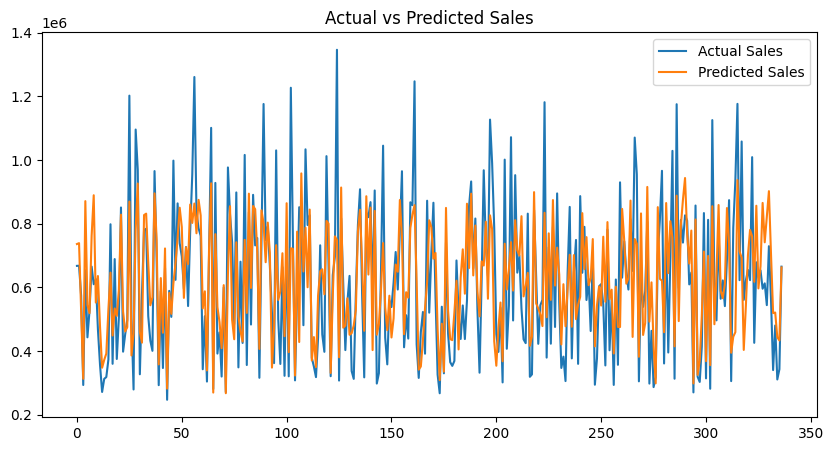

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()
